#### КУРСОВАЯ РАБОТА НА ТЕМУ: "Статистический анализ с элементами EDA данных о стоимости основного сырья (стирол, НАК, бутадиен) и готовой продукции (АБС-пластиков)"
Содержание работы:
- элементы EDA: основные метрики, графическая интерпритация распределения целевого показателя (цена АБС-пластика);
- статистический анализ: выявление уравнения регрессии (зависимости цены АБС-пластика от стоимости сырьевых компонентов); проверка статистической гипотезы о равенстве средней цены на различных рынках (РФ, Европа, Азия)

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [33]:
#df = pd.read_csv('/content/датасет_курсовая_ТВиМС_1.csv')
df = pd.read_csv('C:/Users/FAMILY/Desktop/МАЯК/GeekBrains/ТЕОРИЯ_ВЕРОЯТНОСТЕЙ/Домашние задания/Задание_8/датасет_курсовая_ТВиМС_1.csv')
df

,Date,styrene quote $,butadiene quote euro,SAN quote $,quote ABS Asian,quote ABS Europe,dollar exchange rate,euro exchange rate,ABS selling price
0,Jan-17,1041,1650,1016,1350,1953,60,64,101030
1,Feb-17,1250,1850,1128,1479,2226,59,62,103060
2,Mar-17,1504,1953,1335,1575,2393,58,62,114410
3,Apr-17,1400,1601,1600,1566,2302,56,60,115730
4,May-17,1146,1339,1650,1523,2179,57,63,110040
5,Jun-17,1060,870,1658,1471,2186,58,65,109060
6,Jul-17,1126,770,1665,1425,2184,60,69,105670
7,Aug-17,1169,771,1513,1486,2248,60,70,105060
8,Sep-17,1198,897,1444,1745,2387,58,69,104990
9,Oct-17,1386,776,1460,1956,2336,58,68,107630


In [34]:
df.describe()

,styrene quote $,butadiene quote euro,SAN quote $,quote ABS Asian,quote ABS Europe,dollar exchange rate,euro exchange rate,ABS selling price
count,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,1056.812500,866.791667,1495.87500,1650.645833,2314.312500,64.541667,73.625000,105412.479167
std,276.224443,385.693956,361.06943,316.005958,518.511132,5.999852,7.370513,6664.539776
min,456.000000,200.000000,700.00000,1094.000000,1269.000000,56.000000,60.000000,94983.000000
25%,914.750000,685.500000,1304.25000,1410.500000,2182.750000,59.750000,69.000000,99828.000000
50%,1050.500000,798.000000,1559.50000,1545.000000,2569.000000,64.000000,72.500000,104583.000000
75%,1287.250000,998.000000,1749.25000,1919.750000,2708.750000,67.000000,76.250000,109927.500000
max,1504.000000,1953.000000,2100.00000,2270.000000,2848.000000,78.000000,91.000000,118898.000000


In [35]:
df1 = df.iloc[0:11]
df1 = df1['ABS selling price'].mean()
df2 = df.iloc[12:23]
df3 = df.iloc[24:47]
df2 = df2['ABS selling price'].mean()
df3 = df3['ABS selling price'].mean()
df4 = np.array([df1, df2, df3])
df4


array([107780.        , 108164.72727273, 103163.56521739])

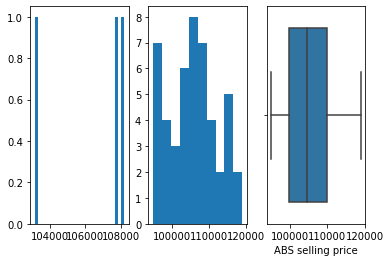

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols = 3)
ax1, ax2, ax3 = ax.flatten()
ax1.hist(df4, bins=30)
ax2.hist(df['ABS selling price'], bins=10)
sns.boxplot(df['ABS selling price'], orient='h', whis=1)
plt.show()

#### Беглый анализ данных показал, что в ДатаСете отсутствуют пропуски; в остальном разбег данных вполне допустим их природой

#### Графическое представление данных о цене целевой продукции (АБС-пластика) за рассматриваемый период с большой натяжкой может быть признан нормально распределенным

#### Попробуем найти корреляцию между стоимостью АБС-пластика в РФ и в Европе (Азии). Для этого приведем размерность цены в соответствие: для сравнения с Азией пересчитаем в доллары, для сравнения с Европой в евро.

In [37]:
df['ABS selling price $'] = df['ABS selling price'] / df['dollar exchange rate']
df['ABS selling price euro'] = df['ABS selling price'] / df['euro exchange rate']

In [38]:
df

,Date,styrene quote $,butadiene quote euro,SAN quote $,quote ABS Asian,quote ABS Europe,dollar exchange rate,euro exchange rate,ABS selling price,ABS selling price $,ABS selling price euro
0,Jan-17,1041,1650,1016,1350,1953,60,64,101030,1683.833333,1578.593750
1,Feb-17,1250,1850,1128,1479,2226,59,62,103060,1746.779661,1662.258065
2,Mar-17,1504,1953,1335,1575,2393,58,62,114410,1972.586207,1845.322581
3,Apr-17,1400,1601,1600,1566,2302,56,60,115730,2066.607143,1928.833333
4,May-17,1146,1339,1650,1523,2179,57,63,110040,1930.526316,1746.666667
5,Jun-17,1060,870,1658,1471,2186,58,65,109060,1880.344828,1677.846154
6,Jul-17,1126,770,1665,1425,2184,60,69,105670,1761.166667,1531.449275
7,Aug-17,1169,771,1513,1486,2248,60,70,105060,1751.000000,1500.857143
8,Sep-17,1198,897,1444,1745,2387,58,69,104990,1810.172414,1521.594203
9,Oct-17,1386,776,1460,1956,2336,58,68,107630,1855.689655,1582.794118


In [39]:
corr_matrix = df.loc[:, ['ABS selling price $', 'quote ABS Asian']].corr()
corr_matrix

,ABS selling price $,quote ABS Asian
ABS selling price $,1.000000,0.155786
quote ABS Asian,0.155786,1.000000


In [40]:
corr_matrix1 = df.loc[:, ['ABS selling price euro', 'quote ABS Europe']].corr()
corr_matrix1

,ABS selling price euro,quote ABS Europe
ABS selling price euro,1.000000,0.584697
quote ABS Europe,0.584697,1.000000


#### Как видно из представленных данных корреляция цены на АБС-пластик между российским и азиатским рынками довольно слабая (0,16), что свидетельствует о независимости ценообразования на этих рынках: т.е. рынки независимы по значимым факторам: сырье, энергетика, рабочая сила и, соответственно, имеют данные ресурсы в избытке локально. 

#### В отношении европы даннная связь более выражена (0,58) и имеет среднее значение: соответственно, данные рынки имеют взаимопроникновение как по сырью, так и по готовой продукции.

#### Нахождение коэффициентов регрессии для уравнения зависимости стоимости АБС-пластика от сырья. Для этого все сырьевые компоненты пересчитаем в единую валюту (котировки сырья пересчитаем из соответствующей валюты в рубли). 

In [41]:
df['styrene quote RUB'] = df['styrene quote $'] * df['dollar exchange rate']
df['butadiene quote RUB'] = df['butadiene quote euro'] * df['euro exchange rate']
df['SAN quote RUB'] = df['SAN quote $'] * df['dollar exchange rate']

In [42]:
x2 = df[['styrene quote RUB', 'butadiene quote RUB', 'SAN quote RUB']].values
x2

array([[ 62460, 105600,  60960],
       [ 73750, 114700,  66552],
       [ 87232, 121086,  77430],
       [ 78400,  96060,  89600],
       [ 65322,  84357,  94050],
       [ 61480,  56550,  96164],
       [ 67560,  53130,  99900],
       [ 70140,  53970,  90780],
       [ 69484,  61893,  83752],
       [ 80388,  52768,  84680],
       [ 72747,  47196, 105492],
       [ 70505,  45885, 108560],
       [ 71456,  53406,  97216],
       [ 74214,  60620,  96900],
       [ 85671,  65240,  98610],
       [ 88816,  74850, 111996],
       [ 89342,  83028, 114638],
       [ 87318,  92710, 116109],
       [ 85239,  88330, 119637],
       [ 84876,  94620, 129558],
       [ 93772, 100567, 142120],
       [ 88176,  87400, 138600],
       [ 85206,  74850, 134508],
       [ 68943,  66451, 116446],
       [ 62846,  62700,  87703],
       [ 61578,  64350,  83490],
       [ 63245,  67784,  85345],
       [ 68835,  65773,  99970],
       [ 71175,  61200, 108485],
       [ 66688,  58176, 115968],
       [ 5

In [43]:
y2 = df['ABS selling price'].values.reshape(-1, 1)
y2

array([[101030],
       [103060],
       [114410],
       [115730],
       [110040],
       [109060],
       [105670],
       [105060],
       [104990],
       [107630],
       [108900],
       [108900],
       [108900],
       [109890],
       [112288],
       [117797],
       [118898],
       [ 99761],
       [103934],
       [104560],
       [106978],
       [106978],
       [ 99828],
       [ 99828],
       [114847],
       [111767],
       [111692],
       [115985],
       [115985],
       [111417],
       [104583],
       [103371],
       [104583],
       [104583],
       [104583],
       [ 98417],
       [ 98417],
       [ 98417],
       [ 95833],
       [ 95833],
       [ 95833],
       [ 95833],
       [ 94983],
       [ 94983],
       [ 94983],
       [102917],
       [102917],
       [102917]], dtype=int64)

In [44]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

In [45]:
x2

array([[1.00000e+00, 6.24600e+04, 1.05600e+05, 6.09600e+04],
       [1.00000e+00, 7.37500e+04, 1.14700e+05, 6.65520e+04],
       [1.00000e+00, 8.72320e+04, 1.21086e+05, 7.74300e+04],
       [1.00000e+00, 7.84000e+04, 9.60600e+04, 8.96000e+04],
       [1.00000e+00, 6.53220e+04, 8.43570e+04, 9.40500e+04],
       [1.00000e+00, 6.14800e+04, 5.65500e+04, 9.61640e+04],
       [1.00000e+00, 6.75600e+04, 5.31300e+04, 9.99000e+04],
       [1.00000e+00, 7.01400e+04, 5.39700e+04, 9.07800e+04],
       [1.00000e+00, 6.94840e+04, 6.18930e+04, 8.37520e+04],
       [1.00000e+00, 8.03880e+04, 5.27680e+04, 8.46800e+04],
       [1.00000e+00, 7.27470e+04, 4.71960e+04, 1.05492e+05],
       [1.00000e+00, 7.05050e+04, 4.58850e+04, 1.08560e+05],
       [1.00000e+00, 7.14560e+04, 5.34060e+04, 9.72160e+04],
       [1.00000e+00, 7.42140e+04, 6.06200e+04, 9.69000e+04],
       [1.00000e+00, 8.56710e+04, 6.52400e+04, 9.86100e+04],
       [1.00000e+00, 8.88160e+04, 7.48500e+04, 1.11996e+05],
       [1.00000e+00, 8.9

In [46]:
XTX = x2.T.dot(x2)
np.linalg.det(XTX)

4.8473190598412745e+31

In [47]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(x2.T).dot(y2)
print(b)

[[ 8.82911814e+04]
 [ 3.11291630e-01]
 [ 4.13096052e-03]
 [-4.18713015e-02]]


#### Т.о., уравнение регрессии будет иметь вид: $$y = 88291 + 0.3113x_1 + 0.0041x_2 - 0.042x_3$$

#### Хотя вычитание в уравнении цены доли, вносимой одним из сырьевых компонентов, вызывает сомнение в правильности найденной зависимости 

#### Посчитаем коэффициент детерминации


In [48]:
z2 = x2.dot(b)
print(f'real: {y2[:6].T}')
print(f'pred: {z2[:6].T}')

real: [[101030 103060 114410 115730 110040 109060]]
pred: [[105618.21149547 108936.14142159 112703.87947433 109341.59664086
  105035.85278056 103636.48478749]]


In [49]:
R2 = z2.var() / y2.var()
R2

0.3575337233192043

#### Как видно коэффициент детерминации не высок. Только 35,7% разброса целевой функции (стоимости АБС-пластика) объясняется сырьем. Это во многом так: так как в расчете использован фактор валютного курса, что приводит к ошибке не по вине продукта и сырья, а также не учтены конъюнктурные колебания за счет заменяемости продуктов (т.е. на цену АБС-пластика влияет стоимость ударопрочного полистирола, т.к. в значительной степени эти продукты являются субститутами)

In [50]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()
mean_approximation_error(y2, z2)

0.041443378301522726

#### Странно, но средняя ошибка апроксимации имеет удовлетворительное значение (4,1%), что говорит о близости теоретических значений целевого показателя (цены АБС-пластика) к расчетным.

#### Статистическая проверка гипотезы методом однофакторного дисперсионного анализа. $$H_0:$$ состоит в том, что считать ли статистически значимым различие средней цены АБС-пластика на различных рынках (РФ, Европа, Азия)

#### Проверка данной гипотезы предполагает сравнение статистики: $$F_H = \frac{\sigma^2_F}{\sigma^2_{res}}$$ со значением функции распределения Фишера-Снедекора для $$F_{crit} = F(k_1, k_2), \alpha=0.05$$

In [51]:
n1 = len(df['ABS selling price'])
n2 = len(df['quote ABS Asian'])
n3 = len(df['quote ABS Europe'])
n = n1 + n2 + n3
k = 3

In [53]:
n1, n2, n3

(48, 48, 48)

#### Находим выборочное среднее по каждой группе¶

In [56]:
ABS_selling_price_mean = df['ABS selling price'].mean()
quote_ABS_Asian_mean = df['quote ABS Asian'].mean()
quote_ABS_Europe_mean = df['quote ABS Europe'].mean()
ABS_selling_price_mean, quote_ABS_Asian_mean, quote_ABS_Europe_mean

(105412.47916666667, 1650.6458333333333, 2314.3125)

#### Находим среднее по всей выборке

In [58]:
fhl = np.concatenate([df['ABS selling price'], df['quote ABS Asian'], df['quote ABS Europe']])
fhl_mean = fhl.mean()
fhl_mean

36459.145833333336

#### Находим сумму квадратов отклонений от общего среднего, сумму квадратов отклонений групповых значений от общего среднего и остаточную сумму квадратов отклонений (ошибку), а также проверяем равенство:$$𝑆^2=𝑆^2_𝐹 + 𝑆^2_{𝑟𝑒𝑠}$$

In [59]:
S2 = ((fhl - fhl_mean)**2).sum()
S2_F = n1 * ((ABS_selling_price_mean - fhl_mean)**2).sum() + n2 * ((quote_ABS_Asian_mean - fhl_mean)**2).sum() + \
       n3 * ((quote_ABS_Europe_mean - fhl_mean)**2).sum()
S2_res = ((df['ABS selling price'] - ABS_selling_price_mean)**2).sum() + ((df['quote ABS Asian'] - quote_ABS_Asian_mean)**2).sum() \
         +((df['quote ABS Europe'] - quote_ABS_Europe_mean)**2).sum()
S2 == S2_F + S2_res

False

In [60]:
S2

344443933469.93744

In [61]:
S2_F

342339047682.66675

In [62]:
S2_res

2104885787.2708337

In [63]:
S2_F + S2_res

344443933469.93756

#### Значительная нестыковка данных возможна из-за округлений в исходном датасете

#### Вычислим несмещенную оценку дисперсий:

In [64]:
sigma2 = S2 / (n-1)
sigma2_F = S2_F / (k - 1)
sigma_res = S2_res / (n - k)
sigma2, sigma2_F, sigma_res

(2408698835.4541078, 171169523841.33337, 14928267.994828608)

In [65]:
F_H = sigma2_F / sigma_res
F_H

11466.134175821953

#### Определим $$F_{crit} , \alpha = 0.05, k_1 = 47, k_2 = 45$$

In [69]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, 29, 27)
F_crit

1.8906743572916815

In [70]:
F_H > F_crit

True

#### F_H находится за пределами критической области, следовательно гипотеза о равенстве средней цены на различных рынках (РФ, Европа и Азия) несостоятельна при уровне значимости 0,05. Правда, справедливости ради, следует сказать, что мы в данном случае не учли размерность: разные рынки обсчитаны в разной валюте, но учитывая то, что установленная ранее корреляция выражена слабо между рынками, можно сказать, что и средние цены на них будут различны.